<a href="https://colab.research.google.com/github/dphi-official/datathons/blob/master/Topper's_notebooks/Data_Sprint_3/Rank_1_Jyothisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPhi

### Data Sprint #3: Abalone
##### Predict the age of Abalone from physical measurements


https://dphi.tech/practice/challenge/25


**Prepared by : Jyothish Kumar C G**

As part of the experimental learning, I have tried different ML models and explored a bit on Cross Validation and Hyper Parameter Tuning. 

**ML Models Tried**

1) Linear Regression
2) Ridge Regression
3) Lasso Regression
4) RandomForest Regressor





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

In [ ]:
train_data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [ ]:
train_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
train_data.Sex.value_counts()

M    1138
I    1013
F     981
Name: Sex, dtype: int64

In [ ]:
train_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
design_report = ProfileReport(train_data)
design_report.to_file(output_file = 'Abalone_EDA.html')

#### Converting Categorical Features to Numerical Features

In [ ]:
gender_cat_to_num_train = pd.get_dummies(train_data.Sex,prefix='Gender')
gender_cat_to_num_train

,Gender_F,Gender_I,Gender_M
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
3127,0,0,1
3128,0,1,0
3129,0,0,1
3130,0,0,1


In [ ]:
gender_cat_to_num_test = pd.get_dummies(test_data.Sex,prefix='Gender')
gender_cat_to_num_test

,Gender_F,Gender_I,Gender_M
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1039,0,1,0
1040,0,1,0
1041,0,1,0
1042,0,0,1


In [ ]:
train_data['is_Female'] = gender_cat_to_num_train['Gender_F']
train_data['is_Male'] = gender_cat_to_num_train['Gender_M']
train_data['is_Infant'] = gender_cat_to_num_train['Gender_I']

In [ ]:
test_data['is_Female'] = gender_cat_to_num_test['Gender_F']
test_data['is_Male'] = gender_cat_to_num_test['Gender_M']
test_data['is_Infant'] = gender_cat_to_num_test['Gender_I']

#### Creating New Features

##### Community Members can try creating new features and see if the model is performing better or not

In [ ]:
train_data['Whole_Shucked_Weight'] = train_data['Whole weight']-train_data['Shucked weight']
#train_data['Shell_Viscera_Weight'] = train_data['Shell weight']-train_data['Viscera weight']

test_data['Whole_Shucked_Weight'] = test_data['Whole weight']-test_data['Shucked weight']
#test_data['Shell_Viscera_Weight'] = test_data['Shell weight']-test_data['Viscera weight']

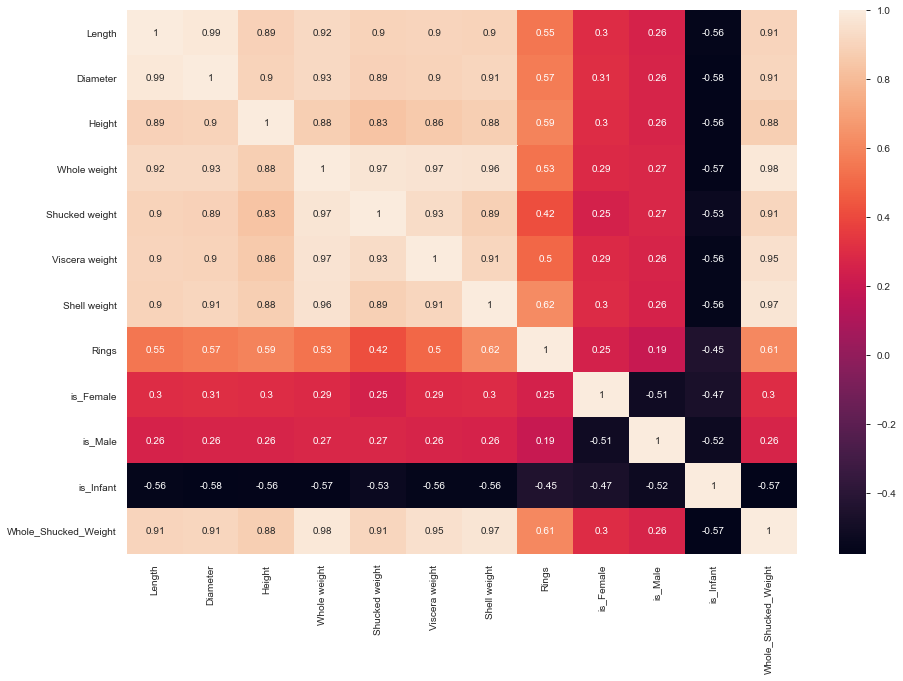

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [ ]:
train_data = train_data.drop('Sex',axis=1)

train_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,is_Female,is_Male,is_Infant,Whole_Shucked_Weight
0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.2080,10,1,0,0,0.3960
1,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.1400,9,1,0,0,0.2765
2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18,0,1,0,1.1925
3,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.6000,19,1,0,0,1.2020
4,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.3450,12,0,1,0,0.6760
...,...,...,...,...,...,...,...,...,...,...,...,...
3127,0.415,0.315,0.120,0.4015,0.1990,0.0870,0.0970,8,0,1,0,0.2025
3128,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,8,0,0,1,0.0955
3129,0.565,0.455,0.155,0.9355,0.4210,0.1830,0.2600,11,0,1,0,0.5145
3130,0.610,0.485,0.145,1.3305,0.7830,0.2255,0.2865,9,0,1,0,0.5475


In [ ]:
from sklearn.model_selection import train_test_split

features = train_data.drop('Rings',axis=1)
target = train_data['Rings']

In [ ]:
train_features,validation_features,train_target,validation_target = train_test_split(features,target,test_size=0.20,random_state=1)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train_features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,is_Female,is_Male,is_Infant,Whole_Shucked_Weight
1363,0.525,0.415,0.170,0.8325,0.2755,0.1685,0.3100,1,0,0,0.5570
937,0.715,0.550,0.190,2.0045,1.0465,0.4070,0.5075,0,1,0,0.9580
1777,0.620,0.540,0.165,1.1390,0.4995,0.2435,0.3570,1,0,0,0.6395
3015,0.385,0.300,0.100,0.2895,0.1215,0.0630,0.0900,0,0,1,0.1680
2138,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.2850,0,1,0,0.5785
...,...,...,...,...,...,...,...,...,...,...,...
2763,0.380,0.280,0.095,0.2885,0.1650,0.0435,0.0670,0,0,1,0.1235
905,0.315,0.250,0.090,0.2030,0.0615,0.0370,0.0795,0,1,0,0.1415
1096,0.690,0.550,0.180,1.6915,0.6655,0.4020,0.5000,0,1,0,1.0260
235,0.705,0.560,0.170,1.4575,0.6070,0.3180,0.4400,1,0,0,0.8505


In [ ]:
model_LR = LinearRegression(normalize = False)
model_LR.fit(train_features, train_target)

LinearRegression()

In [ ]:
print("Model intercept  : ", model_LR.intercept_, "\n")
print("Model coefficient: ", model_LR.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_LR.coef_[i])

Model intercept  :  8970317017556.754 

Model coefficient:  [-1.43304966e-01  7.95571907e+00  1.96954302e+01 -2.14950089e+12
  2.14950089e+12 -1.30114472e+01  5.10600765e+00 -8.97031702e+12
 -8.97031702e+12 -8.97031702e+12  2.14950089e+12] 

Length :  -0.14330496560033038
Diameter :  7.955719065611412
Height :  19.695430151772822
Whole weight :  -2149500889246.236
Shucked weight :  2149500889235.2993
Viscera weight :  -13.011447229859689
Shell weight :  5.106007646611086
is_Female :  -8970317017552.906
is_Male :  -8970317017552.787
is_Infant :  -8970317017553.666
Whole_Shucked_Weight :  2149500889257.8948


**Inference: Model Intercept and Coefficients are very large and is prone to overfitting**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Model evaluation for training set
train_target_pred = model_LR.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Linear Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  13.292969    0.292969
937      12   9.001953   -2.998047
1777     11  11.951172    0.951172
3015      7   7.658203    0.658203
2138     10  10.652344    0.652344
2132     11   9.652344   -1.347656
1421      6   5.755859   -0.244141
1690      9   9.562500    0.562500
2952      5   5.750000    0.750000
1228      9  11.804688    2.804688 

Linear Regression Model training performance:
---------------------------
RMSE is 2.1694803894014316
--------------------------


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
MSE_CV_scores = -1*(cross_val_score(model_LR,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Linear Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Linear Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.1912097447559806
--------------------------


In [ ]:
# Model evaluation for testing set
validation_target_pred = model_LR.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Linear Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.458984    1.458984
110      15  11.908203   -3.091797
2845      9   7.904297   -1.095703
517       7   6.789062   -0.210938
340       9   9.519531    0.519531
1047      4   7.667969    3.667969
1856      8   8.568359    0.568359
1668     11  10.712891   -0.287109
2455      5   5.207031    0.207031
2338      9  10.390625    1.390625 

Linear Regression Model test performance:
---------------------------
RMSE is 2.2528185863445347
--------------------------


### Ridge Regression

#### Tried to reduce the magnitude of model intercept and coefficients using this ML Model

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = False)
ridgecv.fit(train_features, train_target)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [ ]:
ridgecv.alpha_

0.06164233697210317

*0.06164233697210317 is the best lambda value obtained to reduce the magnitude of coefficients*

In [ ]:
model_RR = Ridge(alpha=0.06164233697210317,normalize = False)
model_RR.fit(train_features, train_target)

Ridge(alpha=0.06164233697210317)

In [ ]:
print("Model intercept  : ", model_RR.intercept_, "\n")
print("Model coefficient: ", model_RR.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_RR.coef_[i])

Model intercept  :  3.6840451698454117 

Model coefficient:  [  0.40837427   7.55781853  17.92560155   0.16096462 -11.14243875
 -12.4927188    5.45163971   0.21386627   0.33159564  -0.54546191
  11.30340337] 

Length :  0.4083742710774425
Diameter :  7.557818525923137
Height :  17.9256015496649
Whole weight :  0.1609646247498071
Shucked weight :  -11.142438745491361
Viscera weight :  -12.492718795102807
Shell weight :  5.4516397117443125
is_Female :  0.2138662698510666
is_Male :  0.3315956380965266
is_Infant :  -0.5454619079680822
Whole_Shucked_Weight :  11.303403370225839


#### Magnitude of the model coefficients are reduced

In [ ]:
# Model evaluation for training set
train_target_pred = model_RR.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Ridge Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  13.241397    0.241397
937      12   9.043215   -2.956785
1777     11  11.940525    0.940525
3015      7   7.651084    0.651084
2138     10  10.643361    0.643361
2132     11   9.638683   -1.361317
1421      6   5.775461   -0.224539
1690      9   9.543904    0.543904
2952      5   5.769083    0.769083
1228      9  11.812145    2.812145 

Ridge Regression Model training performance:
---------------------------
RMSE is 2.1696955761085257
--------------------------


In [ ]:
MSE_CV_scores = -1*(cross_val_score(model_RR,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Ridge Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Ridge Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.190399940366372
--------------------------


In [ ]:
# Model evaluation for testing set
validation_target_pred = model_RR.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Ridge Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.444865    1.444865
110      15  11.840926   -3.159074
2845      9   7.879357   -1.120643
517       7   6.816427   -0.183573
340       9   9.496564    0.496564
1047      4   7.659048    3.659048
1856      8   8.609062    0.609062
1668     11  10.682659   -0.317341
2455      5   5.252138    0.252138
2338      9  10.401637    1.401637 

Ridge Regression Model test performance:
---------------------------
RMSE is 2.2501307090270086
--------------------------


### Lasso Regression

#### To reduce the number of features in the Model

In [ ]:
from sklearn.linear_model import Lasso,LassoCV

In [ ]:
lassocv = LassoCV(alphas = alphas, normalize = False)
lassocv.fit(train_features, train_target)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]))

In [ ]:
lassocv.alpha_

0.005

In [ ]:
model_lasso = Lasso(alpha=0.005, normalize= False)
model_lasso.fit(train_features,train_target)

Lasso(alpha=0.005)

In [ ]:
model_lasso.n_iter_

226

In [ ]:
coeff_used = np.sum(model_lasso.coef_!=0)
coeff_used

9

In [ ]:
print("Model intercept  : ", model_lasso.intercept_, "\n")
print("Model coefficient: ", model_lasso.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_lasso.coef_[i])

Model intercept  :  5.294704767654082 

Model coefficient:  [  0.17516051   7.24869521   3.47089419   0.         -10.84927486
  -5.33205034   7.07253998  -0.           0.06651677  -0.86214227
   9.72640544] 

Length :  0.17516051261004292
Diameter :  7.248695210968905
Height :  3.4708941856135493
Whole weight :  0.0
Shucked weight :  -10.84927485944804
Viscera weight :  -5.332050344605625
Shell weight :  7.072539981450261
is_Female :  -0.0
is_Male :  0.06651677390335302
is_Infant :  -0.8621422714826954
Whole_Shucked_Weight :  9.72640543791466


**Whole weight is not a feature to the model**

**is_Female feature is also neglected [This makes our model bad]**

In [ ]:
# Model evaluation for training set
train_target_pred = model_lasso.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Lasso Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  12.707594   -0.292406
937      12   9.516013   -2.483987
1777     11  11.917663    0.917663
3015      7   7.638156    0.638156
2138     10  10.540703    0.540703
2132     11   9.597496   -1.402504
1421      6   6.188572    0.188572
1690      9   9.479346    0.479346
2952      5   6.182097    1.182097
1228      9  11.927263    2.927263 

Lasso Regression Model training performance:
---------------------------
RMSE is 2.197334810201837
--------------------------


In [ ]:
MSE_CV_scores = -1*(cross_val_score(model_lasso,train_features,train_target,cv=10,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Lasso Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Lasso Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.2144331013196283
--------------------------


In [ ]:
# Model evaluation for testing set
validation_target_pred = model_lasso.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Lasoo Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.445862    1.445862
110      15  11.419125   -3.580875
2845      9   7.721105   -1.278895
517       7   7.052891    0.052891
340       9   9.182802    0.182802
1047      4   7.729944    3.729944
1856      8   8.798501    0.798501
1668     11  10.299001   -0.700999
2455      5   5.938979    0.938979
2338      9  10.391797    1.391797 

Lasoo Regression Model test performance:
---------------------------
RMSE is 2.259805370749807
--------------------------


### RandomForest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 20, max_features='auto',max_depth=5,
                                  criterion='mse',verbose=2,n_jobs=-1)

In [ ]:
model_rfr.fit(train_features, train_target)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20building tree 8 of 20

building tree 9 of 20building tree 10 of 20

building tree 11 of 20building tree 12 of 20

building tree 13 of 20building tree 14 of 20

building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20building tree 19 of 20

building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=-1, verbose=2)

In [ ]:
# Model evaluation for training set
train_target_pred = model_rfr.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Random Forest Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  13.553229    0.553229
937      12  11.968972   -0.031028
1777     11  10.735580   -0.264420
3015      7   7.119142    0.119142
2138     10   9.993825   -0.006175
2132     11  10.322407   -0.677593
1421      6   5.326528   -0.673472
1690      9   9.152371    0.152371
2952      5   5.125349    0.125349
1228      9  11.552150    2.552150 

Random Forest Regression Model training performance:
---------------------------
RMSE is 1.9866798172236997
--------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [ ]:
MSE_CV_scores = -1*(cross_val_score(model_rfr,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Random Forest Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Random Forest Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.198489264504242
--------------------------


In [ ]:
# Model evaluation for testing set
validation_target_pred = model_rfr.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  10.853684    0.853684
110      15  11.113269   -3.886731
2845      9   7.119220   -1.880780
517       7   7.071270    0.071270
340       9   8.954177   -0.045823
1047      4   6.870165    2.870165
1856      8   8.629024    0.629024
1668     11  10.314270   -0.685730
2455      5   4.853690   -0.146310
2338      9  10.474041    1.474041 

RandomForest Regression Model test performance:
---------------------------
RMSE is 2.219635723253081
--------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


### HyperParameter Tuning using GridSearchCV to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Different parameters in random forest

max_depth = [5,6,7,8]        # what depth to consider

n_estimators = [50,60,70,75,80,90,100]       # Number of trees in random forest

min_samples_leaf = [5,10,15,20,25,30,40,50]       # Number of features to consider at every split

max_features = ['auto', 'sqrt', 'log2']

params = {'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_leaf': min_samples_leaf,
           'max_features' : max_features
          }

In [ ]:
model_gs = GridSearchCV(estimator=model_rfr, param_grid=params, n_jobs=-1)

In [ ]:
model_gs.fit(train_features, train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90building tree 6 of 90

building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90building tree 11 of 90

building tree 12 of 90
building tree 13 of 90building tree 14 of 90

building tree 15 of 90
building tree 16 of 90
building tree 17 of 90building tree 18 of 90
building tree 19 of 90

building tree 20 of 90
building tree 21 of 90building tree 22 of 90

building tree 23 of 90building tree 24 of 90

building tree 25 of 90building tree 26 of 90

building tree 27 of 90building tree 28 of 90

building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90building tree 34 of 90

building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90building tree 40 of 90

building tree 41 of 90building tree 42 of 90building tree 43 of 90


building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(estimator=RandomForestRegressor(max_depth=5, n_estimators=20,
                                             n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 40, 50],
                         'n_estimators': [50, 60, 70, 75, 80, 90, 100]})

In [ ]:
model_gs.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 90}

#### The final RandomForest model is created using the above parameters

In [ ]:
finalmodel_rfr = RandomForestRegressor(n_estimators = 90, max_features='auto',max_depth=8, min_samples_leaf= 10,
                                  criterion='mse',verbose=2,n_jobs=-1)

In [ ]:
finalmodel_rfr.fit(train_features, train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s


building tree 1 of 90building tree 2 of 90

building tree 3 of 90
building tree 4 of 90
building tree 5 of 90building tree 6 of 90

building tree 7 of 90building tree 8 of 90

building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90building tree 14 of 90

building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90building tree 22 of 90

building tree 23 of 90building tree 24 of 90

building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90building tree 29 of 90

building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.3s finished


RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=90,
                      n_jobs=-1, verbose=2)

In [ ]:
# Model evaluation for testing set
train_target_pred = finalmodel_rfr.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest HyperParameter Tuned Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  14.136467    1.136467
937      12  10.943036   -1.056964
1777     11  11.051016    0.051016
3015      7   7.302328    0.302328
2138     10   9.659460   -0.340540
2132     11  10.071559   -0.928441
1421      6   5.213425   -0.786575
1690      9   8.967837   -0.032163
2952      5   5.167956    0.167956
1228      9  10.335215    1.335215 

RandomForest HyperParameter Tuned Regression Model training performance:
---------------------------
RMSE is 1.7763472804195002
--------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


In [ ]:
MSE_CV_scores = -1*(cross_val_score(finalmodel_rfr,train_features,train_target,cv=10,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("RandomForest HyperParameter Tuned Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

RandomForest HyperParameter Tuned Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.118051945424234
--------------------------


In [ ]:
# Model evaluation for testing set
validation_target_pred = finalmodel_rfr.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest HyperParameter Tuned Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  10.554592    0.554592
110      15  10.807640   -4.192360
2845      9   7.655411   -1.344589
517       7   6.826221   -0.173779
340       9  10.020626    1.020626
1047      4   6.908130    2.908130
1856      8   8.381648    0.381648
1668     11   9.701406   -1.298594
2455      5   4.847171   -0.152829
2338      9  10.142018    1.142018 

RandomForest HyperParameter Tuned Regression Model test performance:
---------------------------
RMSE is 2.1544089260202473
--------------------------


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


### Training Performance got improved, but is prone to overfitting

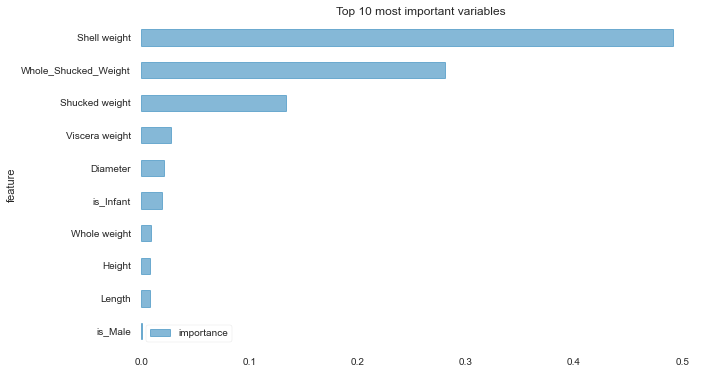

In [ ]:
feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_rfr.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

#### The new feature created is identified as an important feature in the model . Please explore with different new features in your model 

In [ ]:
test_data = test_data.drop('Sex',axis=1)

test_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,is_Female,is_Male,is_Infant,Whole_Shucked_Weight
0,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785,1,0,0,0.5955
1,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650,0,0,1,0.1220
2,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900,0,0,1,0.1585
3,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700,1,0,0,0.5360
4,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490,1,0,0,0.5650
...,...,...,...,...,...,...,...,...,...,...,...
1039,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300,0,0,1,0.0545
1040,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.1860,0,0,1,0.3290
1041,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.1400,0,0,1,0.2485
1042,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950,0,1,0,0.7665


In [ ]:
test_features = test_data

In [ ]:
target = finalmodel_rfr.predict(test_features)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.0s finished


In [ ]:
target

array([ 9.68299606,  6.64753325,  7.17597433, ...,  8.26508777,
       10.84813692,  8.36760511])

In [ ]:
res = pd.DataFrame(target)
res.index = test_data.index 
res.columns = ["prediction"]
res.to_csv("submission_rfr.csv")  

### Feel free to edit the notebook and improve your model

### Happy Learning !!!